# DeepSeek-OCR Tutorial (T4 Compatible)

## What is DeepSeek-OCR?

DeepSeek-OCR achieves ~10x text compression using vision as a compression layer, maintaining 97% accuracy.

**Key insight**: A text page needs 2,000-5,000 tokens, but as an image only 200-400 vision tokens.

**GPU Note**: This tutorial requires a GPU, preferably with high RAM enabled

## Check GPU

In [ ]:
!nvidia-smi

import torch
print(f"\nPyTorch: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

Thu Nov 13 14:38:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Installation

In [ ]:
# Install core dependencies
!pip install -q torch torchvision --index-url https://download.pytorch.org/whl/cu118
!pip install -q transformers==4.46.3 tokenizers==0.20.3
!pip install -q einops addict easydict Pillow matplotlib
!pip install -q flash-attn --no-build-isolation

print("✓ Installation complete!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 118.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 71.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
✓ Installation complete!


## Load Model

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

model_name = 'deepseek-ai/DeepSeek-OCR'
print("Loading model...")

tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModel.from_pretrained(
    model_name,
    trust_remote_code=True,
    use_safetensors=True
)
model = model.eval().cuda().to(torch.bfloat16)

print("Model loaded successfully")
print(f"Memory allocated: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")

Using device: cuda
Loading model...


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

modeling_deepseekocr.py: 0.00B [00:00, ?B/s]

configuration_deepseek_v2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- configuration_deepseek_v2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


deepencoder.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- deepencoder.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_deepseekv2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- modeling_deepseekv2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


conversation.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- modeling_deepseekocr.py
- configuration_deepseek_v2.py
- deepencoder.py
- modeling_deepseekv2.py
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00001-of-000001.safetensors:   0%|          | 0.00/6.67G [00:00<?, ?B/s]

Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at deepseek-ai/DeepSeek-OCR and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded successfully
Memory allocated: 6.36 GB


## Helper Functions

In [ ]:
def load_image(image_source):
    """Load image from URL or file path"""
    if image_source.startswith('http'):
        response = requests.get(image_source)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        image = Image.open(image_source).convert('RGB')
    return image

print("Helper functions ready")

Helper functions ready


## Load Sample Image

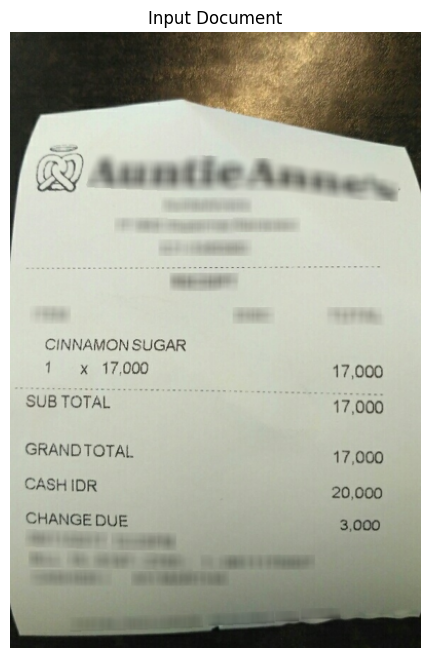

Saved to: /tmp/input_image.jpg


In [ ]:
# Load receipt
image_url = "https://ofasys-multimodal-wlcb-3-toshanghai.oss-accelerate.aliyuncs.com/wpf272043/keepme/image/receipt.png"
image = load_image(image_url)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.title("Input Document")
plt.show()

# Save for infer() method
image_path = "/tmp/input_image.jpg"
image.save(image_path)
print(f"Saved to: {image_path}")

## Basic OCR

In [ ]:
prompt = "<image>\nFree OCR."

print("Running OCR...")

result = model.infer(
    tokenizer,
    prompt=prompt,
    image_file=image_path,
    output_path="/tmp",
    base_size=1024,
    image_size=640,
    crop_mode=True,
    save_results=False,
    test_compress=False
)

print("\n" + "="*60)
print("EXTRACTED TEXT:")
print("="*60)

if result is not None:
    print(result)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Running OCR...


The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Calling `get_max_cache()` will raise error from v4.48
The attention layers in this model are transitioning from computing the RoPE embeddings internally through `position_ids` (2D tensor with the indexes of the tokens), to using externally computed `position_embeddings` (Tuple of tensors, containing cos and sin). In v4.46 `position_ids` will be removed and `position_embeddings` will be mandatory.


BASE:  torch.Size([1, 256, 1280])
NO PATCHES
Auntie Anne

CINNAMON SUGAR  
1 x 17,000  
17,000  

SUB TOTAL  
17,000  

GRAND TOTAL  
17,000  

CASH IDR  
20,000  

CHANGE DUE  
3,000

EXTRACTED TEXT:


## Markdown Conversion

In [ ]:
prompt_md = "<image>\n<|grounding|>Convert the document to markdown."

print("Converting to Markdown...")

result_md = model.infer(
    tokenizer,
    prompt=prompt_md,
    image_file=image_path,
    output_path="/tmp",
    base_size=1024,
    image_size=640,
    crop_mode=True,
    save_results=False,
    test_compress=False
)

print("\n" + "="*60)
print("MARKDOWN OUTPUT:")
print("="*60)

if result_md is not None:
    print(result_md)

Converting to Markdown...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
NO PATCHES
<|ref|>image<|/ref|><|det|>[[60, 170, 940, 280]]<|/det|>
 

<|ref|>text<|/ref|><|det|>[[88, 492, 437, 525]]<|/det|>
CINNAMON SUGAR 

<|ref|>text<|/ref|><|det|>[[88, 530, 902, 565]]<|/det|>
1 x 17,000 17,000 

<|ref|>text<|/ref|><|det|>[[40, 584, 902, 625]]<|/det|>
SUB TOTAL 17,000 

<|ref|>text<|/ref|><|det|>[[40, 661, 902, 703]]<|/det|>
GRAND TOTAL 17,000 

<|ref|>text<|/ref|><|det|>[[40, 718, 902, 760]]<|/det|>
CASH IDR 20,000 

<|ref|>text<|/ref|><|det|>[[40, 775, 902, 816]]<|/det|>
CHANGE DUE 3,000

MARKDOWN OUTPUT:


## Test Different Resolution Modes

In [ ]:
modes = {
    "Small": {"base_size": 640, "image_size": 640, "crop_mode": False},
    "Base": {"base_size": 1024, "image_size": 1024, "crop_mode": False},
    "Gundam": {"base_size": 1024, "image_size": 640, "crop_mode": True},
}

prompt = "<image>\nFree OCR."

for mode_name, config in modes.items():
    print(f"\n{'='*60}")
    print(f"Testing: {mode_name}")
    print(f"Config: base_size={config['base_size']}, crop_mode={config['crop_mode']}")
    print(f"{'='*60}")

    result = model.infer(
        tokenizer,
        prompt=prompt,
        image_file=image_path,
        output_path="/tmp",
        **config,
        save_results=False,
        test_compress=False
    )

    if result is not None:
        print(f"Output length: {len(result)} characters")
        print(f"Preview: {result[:150]}...")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



Testing: Small
Config: base_size=640, crop_mode=False
directly resize
BASE:  torch.Size([1, 100, 1280])
NO PATCHES
# Auntie Anne

CINNAMON SUGAR  
1 × 17,000  
17,000  

SUB TOTAL  
17,000  

GRAND TOTAL  
17,000  

CASH IDR  
20,000  

CHANGE DUE  
3,000

Testing: Base
Config: base_size=1024, crop_mode=False


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
NO PATCHES
Auntie Anne

CINNAMON SUGAR  
1 x 17,000  
17,000  

SUB TOTAL  
17,000  

GRAND TOTAL  
17,000  

CASH IDR  
20,000  

CHANGE DUE  
3,000

Testing: Gundam
Config: base_size=1024, crop_mode=True


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
NO PATCHES
Auntie Anne

CINNAMON SUGAR  
1 x 17,000  
17,000  

SUB TOTAL  
17,000  

GRAND TOTAL  
17,000  

CASH IDR  
20,000  

CHANGE DUE  
3,000


## Process Document From File Path

In [ ]:
def process_document(file_path, prompt="<image>\n<|grounding|>Convert the document to markdown."):
    """Process a document from file path"""
    print(f"\nProcessing: {file_path}")
    print("-" * 60)

    # Load and display
    img = Image.open(file_path).convert('RGB')
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(file_path)
    plt.show()

    # Run OCR
    print("Running OCR...")
    result = model.infer(
        tokenizer,
        prompt=prompt,
        image_file=file_path,
        output_path="/tmp",
        base_size=1024,
        image_size=640,
        crop_mode=True,
        save_results=False,
        test_compress=False
    )

    print("\n" + "="*60)
    print("EXTRACTED TEXT:")
    print("="*60)

    if result is not None:
        print(result)

    return result

print("Function defined")

Function defined


## Example: Process Sample Image

In [ ]:
# Process the sample receipt
result = process_document("/path/to/image.jpg")

## Upload & Process Your Own Document

In [ ]:
from google.colab import files

# Upload files
print("Upload image(s):")
uploaded = files.upload()

# Process each
for filename, content in uploaded.items():
    # Save to temp
    temp_path = f"/tmp/{filename}"
    with open(temp_path, 'wb') as f:
        f.write(content)

    # Process
    process_document(temp_path)

## Resolution Modes Reference

| Mode | base_size | Tokens | Compression | Accuracy | T4 Time |
|------|-----------|--------|-------------|----------|----------|
| Tiny | 512 | ~64 | ~20x | ~60% | ~30s |
| Small | 640 | ~100 | ~15x | ~80% | ~45s |
| Base | 1024 | ~256 | ~10x | ~97% | ~90s |
| Gundam | 1024 (tiled) | ~256 | ~10x | ~97% | ~90s |
| Large | 1280 | ~400 | ~8x | ~99% | ~120s |

## Resources

- **Paper**: [arXiv:2510.18234](https://arxiv.org/abs/2510.18234)
- **GitHub**: [deepseek-ai/DeepSeek-OCR](https://github.com/deepseek-ai/DeepSeek-OCR)
- **Model**: [HuggingFace](https://huggingface.co/deepseek-ai/DeepSeek-OCR)

## Citation

```bibtex
@article{wei2025deepseek,
  title={DeepSeek-OCR: Contexts Optical Compression},
  author={Wei, Haoran and Sun, Yaofeng and Li, Yukun},
  journal={arXiv preprint arXiv:2510.18234},
  year={2025}
}
```